<a href="https://colab.research.google.com/github/zhuo0115/AI/blob/main/CNN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 10)                23050     
                                                                 
Total params: 23,466
Trainable params: 23,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 20s 160ms/step - loss: 2.3766 - accuracy: 0.8513
Epoch 2/10
118/118 [==============================] - 19s 164ms/step - loss: 0.2158 - accuracy: 0.9606
Epoch 3/10
118/118 [==============================] - 15s 131ms/step - loss: 0.1077 - accuracy: 0.9748
Epoch 4/10
118/118 [==============================] - 15s 130ms/step - loss: 0.0689 - accuracy: 0.9819
Epoch 5/10
118/118 [==============================] - 15s 129ms/step - loss: 0.0494 - accuracy: 0.9862
Epoch 6/10
118/118 [==============================] - 15s 129ms/step - loss: 0.0352 - accuracy: 0.9892
Epoch 7/10
118/118 [==============================] - 17s 140ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 8/10
118/118 [==============================] - 15s 130ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 9/10
118/118 [==============================] - 15s 128ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 10/10
118/118 [==============================] - 15s 128ms/step - l

In [ ]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.1339 - accuracy: 0.9759
0.9758999943733215


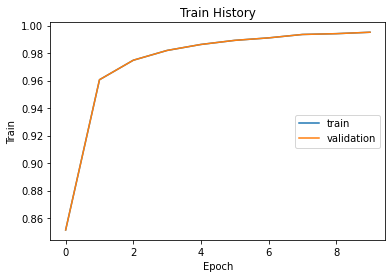

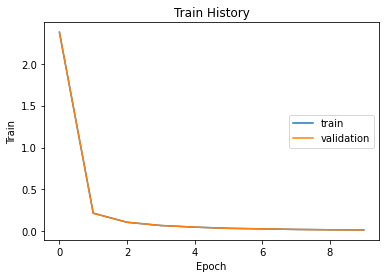

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,3,0,1,0,3,2,2,0
1,0,1130,1,0,1,1,0,2,0,0
2,3,11,1007,0,2,0,1,6,1,1
3,0,0,3,987,0,10,0,8,1,1
4,0,2,2,0,961,0,4,4,1,8
5,1,0,0,4,0,880,1,0,3,3
6,8,3,0,0,5,16,923,0,3,0
7,0,4,10,0,1,0,0,1013,0,0
8,6,4,3,7,2,4,3,6,931,8


In [ ]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])